In [10]:
from helpers import reader
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter
import numpy as np
import math

In [11]:
font = {
        'size'   : 13}
matplotlib.rc('font', **font)
colors = ['#003f5c','#7a5195','#ef5675','#ffa600']
mc = False


In [12]:
r = reader.Reader(mc=mc)
r.read_results()

#df_filtered = r.df.groupby(['N', 'blocksize']).agg({'blocksize':'size', 'success_rate':'mean'}) \
 #       .rename(columns={'blocksize':'count','success_rate':'success_rate'}) \
  #     .reset_index()
#df_filtered['std'] = r.df.groupby(['N', 'blocksize'])['success_rate'].agg(['std']).reset_index()['std']


df_filtered = r.df.groupby(['N', 'blocksize','N_dim'])['success_rate'].agg(['mean', 'count', 'std']).rename(columns={'mean':'success_rate'})

#ci95_hi = []
#ci95_lo = []
error_margin = []

for i in df_filtered.index:
    _, c, s = df_filtered.loc[i]
    #ci95_hi.append(m + 1.96*s/math.sqrt(c))
    #ci95_lo.append(m - 1.96*s/math.sqrt(c))
    error_margin.append(1.96*s/math.sqrt(c))

#stats['ci95_hi'] = ci95_hi
#stats['ci95_lo'] = ci95_lo
df_filtered['error_margin'] = error_margin
df_filtered = df_filtered.reset_index()
df_filtered



,N,blocksize,N_dim,success_rate,count,std,error_margin
0,143,1,4,11.775000,12,5.002931,2.830675
1,143,2,4,12.425000,12,5.587181,3.161245
2,143,3,4,15.483333,12,4.282275,2.422925
3,143,4,4,13.208333,12,1.753157,0.991942
4,143,5,4,14.175000,12,3.637713,2.058230
...,...,...,...,...,...,...,...
434,3062357,21,18,0.000000,5,0.000000,0.000000
435,3631381,21,19,0.000000,5,0.000000,0.000000
436,3844417,21,18,0.000000,5,0.000000,0.000000
437,3893147,21,19,0.000000,5,0.000000,0.000000


In [13]:
print(len(bin(8549))-2)
df_filtered.query('N==8549')


14


,N,blocksize,N_dim,success_rate,count,std,error_margin
220,8549,1,10,0.10,5,0.100000,0.087654
221,8549,2,10,0.06,5,0.134164,0.117600
222,8549,3,10,0.22,5,0.268328,0.235200
223,8549,4,10,0.26,5,0.230217,0.201794
224,8549,5,10,0.70,5,0.452769,0.396870
225,8549,6,10,0.20,5,0.158114,0.138593
226,8549,7,10,0.10,5,0.100000,0.087654
227,8549,8,10,0.28,5,0.164317,0.144030
228,8549,9,10,0.06,5,0.134164,0.117600
229,8549,10,10,0.02,5,0.044721,0.039200


df_filtered_flat = df_filtered.copy()
df_dict = {'N':[], 'ratio':[], 'success_rate':[],'dim':[], 'prob':[], 'count':[],'error_margin':[]}
for N in df_filtered_flat['N'].unique():
    df_filtered_n = df_filtered_flat[df_filtered_flat['N']==N].sort_values(by='blocksize', ascending=False)
    if df_filtered_n.iloc[1: , :].empty:
        continue
    print(df_filtered_n)
    df_dict['N'].append(N)
    df_dict['dim'].append()
    df_dict['ratio'].append(df_filtered_n.head(1)['success_rate'].iloc[0] / df_filtered_n.iloc[1: , :].head(1)['success_rate'].iloc[0])
    df_dict['success_rate'].append(df_filtered_n['success_rate'].max())
    df_dict['prob'].append(1/(2**(len(bin(N))-4))*100)
    df_dict['count'].append(df_filtered_n['count'].min())
    df_dict['error_margin'].append(df_filtered_n.head(1)['error_margin'].iloc[0])
    
result_df = pd.DataFrame(df_dict)


result_df['N_dim'] = result_df['N'].apply(bin).apply(len)-2
#max_dim, min_dim = df_dict['N_dim'].max(), df_dict['N_dim'].min()

result_df

In [14]:
#display_max_df = result_df[['N', 'success_rate', 'count' ,'error_margin' ]].query('N == 143 or N==169 or N==253 or N ==517 or N==2669 or N ==59989 or N ==253009 or N==376289')

In [15]:
# get only max blocksize success probs
df_filtered_flat = df_filtered.copy()
df_dict = {'N':[], 'success_rate':[],'error_margin':[], 'N_dim':[]}
for N in df_filtered_flat['N'].unique():
    df_filtered_n = df_filtered_flat[df_filtered_flat['N']==N].sort_values(by='blocksize', ascending=False).iloc[0]
    df_dict['N'].append(int(df_filtered_n['N']))
    df_dict['N_dim'].append(int(df_filtered_n['N_dim']))
    #df_dict['N_dim'].append(1)

    df_dict['success_rate'].append(df_filtered_n['success_rate'])
    df_dict['error_margin'].append(df_filtered_n['error_margin'])
    #df_dict['success_rate'].append()
df_max_blocksize = pd.DataFrame(df_dict).query('N != 2530091')
#df_max_blocksize['N_dim'] = df_max_blocksize['N'].apply(bin).apply(len)-2
df_max_blocksize

,N,success_rate,error_margin,N_dim
0,143,50.433333,2.929919,4
1,169,44.658333,7.541022,4
2,187,16.350000,2.687774,5
3,209,12.833333,2.628214,5
4,221,17.150000,7.064479,5
...,...,...,...,...
139,3062357,0.000000,0.000000,18
140,3631381,0.000000,0.000000,19
141,3844417,0.000000,0.000000,18
142,3893147,0.000000,0.000000,19


In [16]:
unsolvable_df = df_max_blocksize.query('success_rate==0')[['N_dim','N']].groupby('N_dim').count()
unsolvable_df

,N
N_dim,
12,2
13,6
14,6
15,6
16,12
17,5
18,12
19,5


In [17]:
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

In [18]:
grouped_df_dim = df_max_blocksize.groupby(['N_dim'])['success_rate'].agg(['mean','count', q25, q75]).rename(columns={'mean':'success_rate'})
grouped_df_dim['unsolvables'] = df_max_blocksize.query('success_rate==0')[['N_dim','N']].groupby('N_dim').count()
grouped_df_dim['unsolvables'] = grouped_df_dim['unsolvables'] / grouped_df_dim['count']
grouped_df_dim = grouped_df_dim.reset_index()
grouped_df_dim['q25i'] = abs(grouped_df_dim['success_rate']-grouped_df_dim['q25'])
grouped_df_dim['q75i'] = abs(grouped_df_dim['q75'] - grouped_df_dim['success_rate'])

grouped_df_dim['prob'] = grouped_df_dim['N_dim'].apply(lambda dim: 1/(2**(dim))*100)
grouped_df_dim['unsolvables'] = grouped_df_dim['unsolvables'].fillna(0)
grouped_df_dim



if mc:
    filename = 'mc.pckl'
else:
    filename = 'mmt.pckl'
with open(f'/home/atg205/Documents/clone-multiplier-encoder-5/p/dfs/success/{filename}','wb') as f:
    grouped_df_dim.to_pickle(f)

grouped_df_dim

,N_dim,success_rate,count,q25,q75,unsolvables,q25i,q75i,prob
0,4,47.545833,2,46.102083,48.989583,0.000000,1.443750,1.443750,6.250000
1,5,18.747037,9,16.350000,17.150000,0.000000,2.397037,1.597037,3.125000
2,6,10.627619,7,5.036667,13.140000,0.000000,5.590952,2.512381,1.562500
3,7,6.351429,7,2.515000,8.595000,0.000000,3.836429,2.243571,0.781250
4,8,1.605476,7,0.930000,2.079167,0.000000,0.675476,0.473690,0.390625
5,9,1.082292,12,0.475000,1.556875,0.000000,0.607292,0.474583,0.195312
6,10,7.132000,10,0.120000,0.852500,0.000000,7.012000,6.279500,0.097656
7,11,0.273750,8,0.037500,0.230000,0.000000,0.236250,0.043750,0.048828
8,12,0.126667,12,0.020000,0.125000,0.166667,0.106667,0.001667,0.024414
9,13,0.052727,11,0.000000,0.020000,0.545455,0.052727,0.032727,0.012207


grouped_df_dim = df_max_blocksize.groupby(['N_dim'])['success_rate'].agg(['mean', 'count', 'std']).rename(columns={'mean':'success_rate'})
grouped_df_dim['unsolvables'] = df_max_blocksize.query('success_rate==0')[['N_dim','N']].groupby('N_dim').count()
grouped_df_dim['unsolvables'] = grouped_df_dim['unsolvables'] / grouped_df_dim['count']

print(grouped_df_dim)
error_margin = []

for i in grouped_df_dim.index:
    _, c, s,_ = grouped_df_dim.loc[i]
    #ci95_hi.append(m + 1.96*s/math.sqrt(c))
    #ci95_lo.append(m - 1.96*s/math.sqrt(c))
    error_margin.append(1.96*s/math.sqrt(c))

    
grouped_df_dim['error_margin'] = error_margin
grouped_df_dim = grouped_df_dim.reset_index()
#grouped_df_dim['prob'] = grouped_df_dim['N_dim']
grouped_df_dim['prob'] = grouped_df_dim['N_dim'].apply(lambda dim: 1/(2**(dim))*100)
grouped_df_dim['unsolvables'] = grouped_df_dim['unsolvables'].fillna(0)


if mc:
    filename = 'mc.pckl'
else:
    filename = 'mmt.pckl'
with open(f'/home/atg205/Documents/clone-multiplier-encoder-5/p/dfs/success/{filename}','wb') as f:
    grouped_df_dim.to_pickle(f)

grouped_df_dim

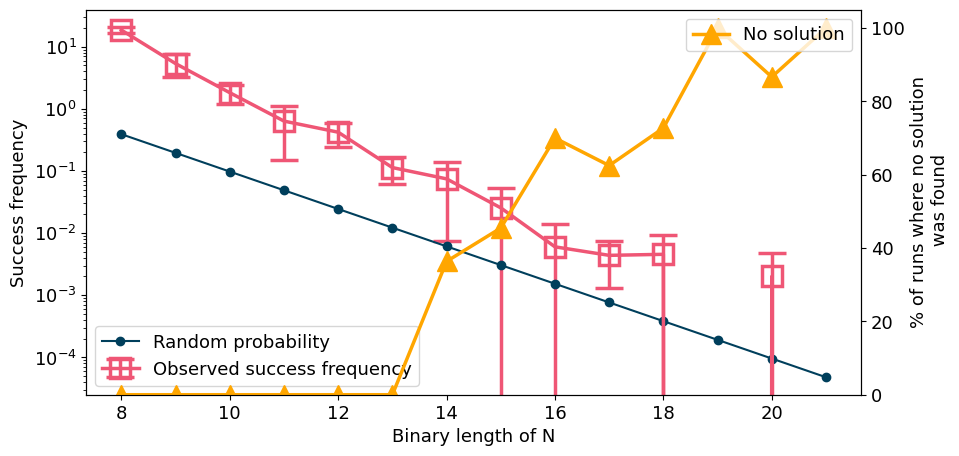

In [52]:

fig = plt.figure(figsize=(10,5))
ax_success = fig.gca()
ax_unsolvable = ax_success.twinx()

ax_success.errorbar(grouped_df_dim['N_dim'], grouped_df_dim['success_rate'], grouped_df_dim['error_margin'],fmt='so^'[0]+'-', mfc='none', markersize=15, capsize=10,  # capsize=(10 if resultsall[systemi]['run','count'].iloc[0] > 1 else 0), 
                markeredgewidth=2.5, linewidth=2.5, label="Observed success frequency", color=colors[2])
ax_success.plot(grouped_df_dim['N_dim'], grouped_df_dim['prob'], marker='o', label="Random probability", color =colors[0])
ax_success.set_ylabel('Success frequency')
#plt.ylim(0,1)
ax_success.set_yscale('log')

ax_unsolvable.plot(grouped_df_dim['N_dim'], grouped_df_dim['unsolvables']*100, color=colors[3],linewidth=2.5, marker='^',markersize=15, label="No solution")
ax_unsolvable.set_ylabel('% of runs where no solution\n was found')
ax_unsolvable.set_ylim(0,105)


# Add legends for both bar graphs
#lines1, labels1 = ax_success.get_legend_handles_labels()
#lines2, labels2 = ax_unsolvable.get_legend_handles_labels()

#ax_success.legend(lines1 + lines2, labels1 + labels2, loc='lower left')
ax_success.legend(loc="lower left")
ax_unsolvable.legend(loc="upper right")

ax_success.set_xlabel('Binary length of N')
plt.savefig('figures/mc_success_prob.svg', bbox_inches='tight')
plt.show()
#plt.plot(grouped_df_dim['N_dim'], grouped_df_dim['success_rate'])



In [10]:
#result_df[['N', 'success_rate','prob', '+count']].query('N==')

NameError: name 'result_df' is not defined

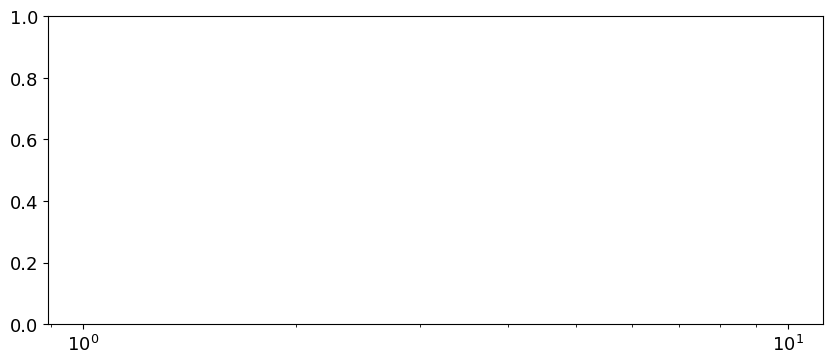

In [11]:


fig = plt.figure(figsize=(10,4))

plt.xscale('log')
plt.scatter(result_df['success_rate'], result_df['ratio'], marker='o', linestyle='None', c=result_df["N_dim"], cmap='plasma')
plt.plot([0,100], [1,1], color='black')
plt.xlabel(r'Maximum success frequency')
plt.ylabel(r'$\frac{\mathrm{success\: freq_{direct\:method}}}{\mathrm{success\:freq_{best\:block}}}$', fontsize=15)
plt.colorbar(label="Binary lenght of N")
plt.ylim(0,10)
plt.savefig('figures/mc_ratios.svg',bbox_inches='tight')
plt.show()

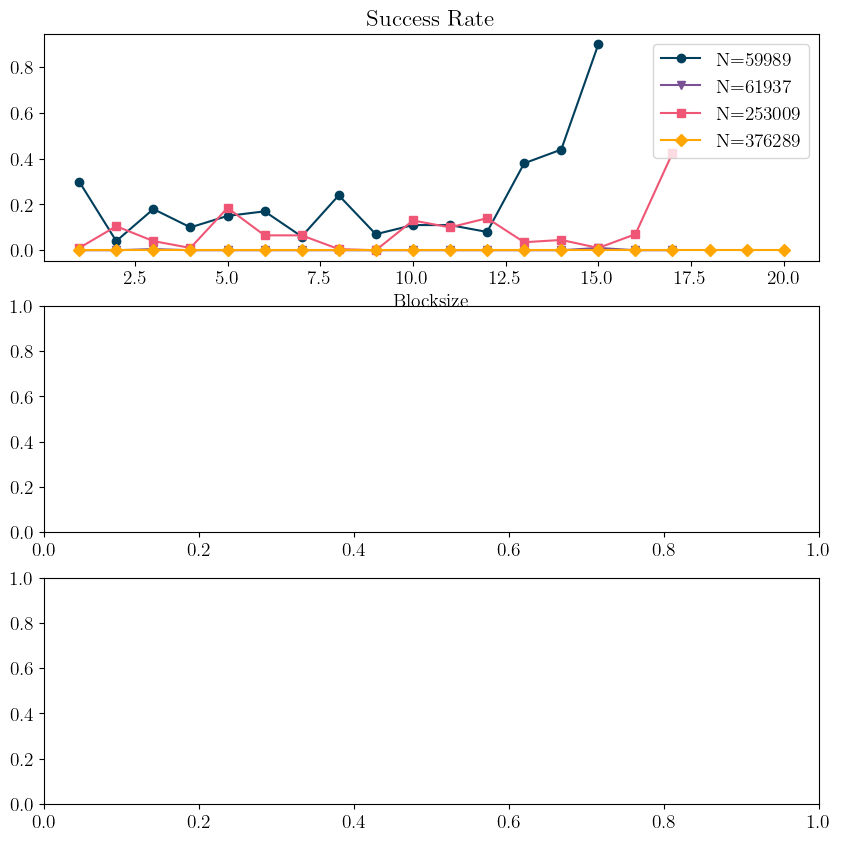

In [ ]:
Ns = [59989,61937,253009,376289]
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
axs = axs.flatten()  # easier indexing
ax = axs[0]
colors = ['#003f5c', '#7a5195', '#ef5675', '#ffa600']
markers = ['o','v','s', 'D']
for j,N in enumerate(Ns):
    df = df_filtered.query(f"N=={N}").reset_index()
    ax.plot(df['blocksize'], df[['success_rate']],marker=markers[j], label=f'N={N}', color=colors[j])
    


# Set title for each subplot
ax.set_title("Success Rate")
ax.set_xlabel('Blocksize')
# Add legend
ax.legend(loc='upper right')
plt.show()

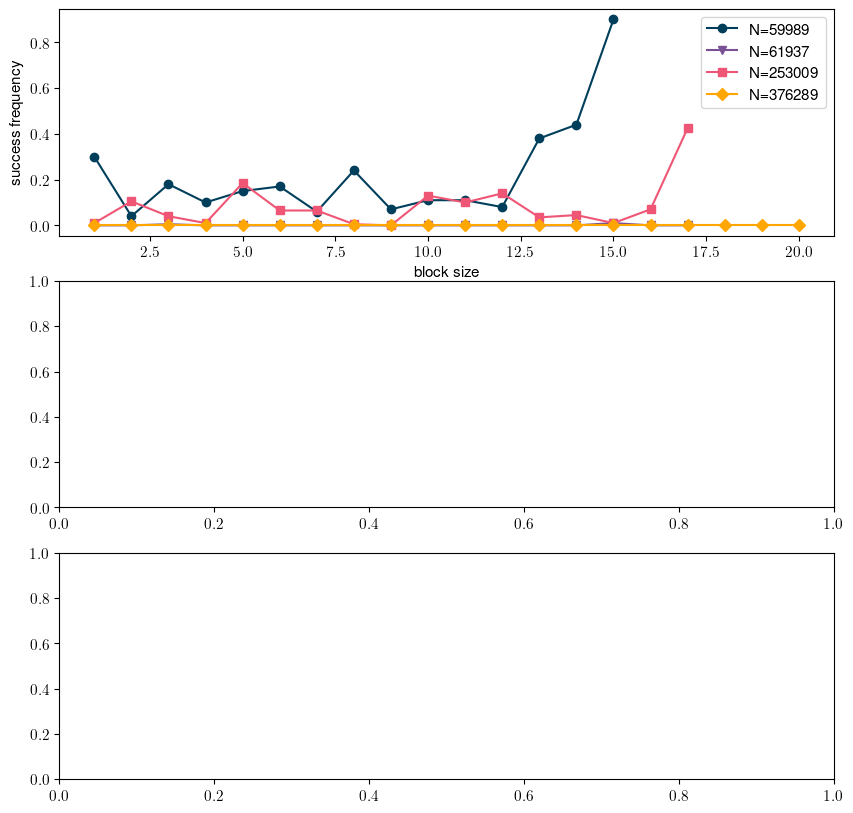

In [ ]:
Ns = [59989,61937,253009,376289]
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
axs = axs.flatten()  # easier indexing
ax = axs[0]
colors = ['#003f5c', '#7a5195', '#ef5675', '#ffa600']
markers = ['o','v','s', 'D']
for j,N in enumerate(Ns):
    df = df_filtered.query(f"N=={N}").reset_index()
    ax.plot(df['blocksize'], df[['success_rate']],marker=markers[j], label=f'N={N}', color=colors[j])
    


# Set title for each subplot
ax.set_ylabel("success frequency")
ax.set_xlabel('block size')
# Add legend
ax.legend(loc='upper right')
plt.show()

## Analyze the energy landscape

In [ ]:
N = 2530091
r = reader.Reader()
result_dfs = r.return_dfs(N, blocksize=17)
result_df = result_dfs[N][0]
violations_grouped = result_df[['num_occurrences', 'violations']].groupby(by='violations').sum().reset_index()
violations_grouped
result_df

,p0,p1,p2,p3,p4,p5,p6,q0,q1,q2,...,t8,t9,chain_break_fraction,energy,num_occurrences,a,b,valid,violations,blocksize
505,1,1,1,1,1,1,1,1,1,1,...,0,0,0.031746,19523392.0,1,511,511,False,17,17
671,1,1,1,1,1,1,1,0,1,1,...,0,0,0.015873,20151345.0,1,511,509,False,24,17
328,1,1,0,1,1,1,1,1,1,1,...,0,0,0.047619,22780624.0,1,503,511,False,20,17
982,0,1,1,1,1,1,1,1,1,1,...,1,1,0.000000,25567265.0,1,509,495,False,25,17
563,1,1,1,1,1,1,1,1,1,1,...,0,1,0.031746,26817088.0,1,511,511,False,26,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0,1,1,0,1,1,1,1,1,1,...,0,1,0.047619,410068673.0,1,493,511,False,30,17
968,1,1,1,1,1,1,1,1,0,1,...,1,1,0.063492,410706116.0,1,511,491,False,31,17
953,0,0,0,1,1,1,1,1,1,1,...,1,0,0.031746,434180257.0,1,497,511,False,30,17
942,0,0,1,1,1,1,1,1,1,1,...,0,1,0.063492,505545193.0,1,505,495,False,33,17


In [ ]:
valid_df = result_df.query('valid')
valid_violations_grouped = valid_df[['num_occurrences', 'violations']].groupby(by='violations').sum().reset_index()
valid_violations_grouped

,violations,num_occurrences
0,16,1
1,18,1
2,20,1


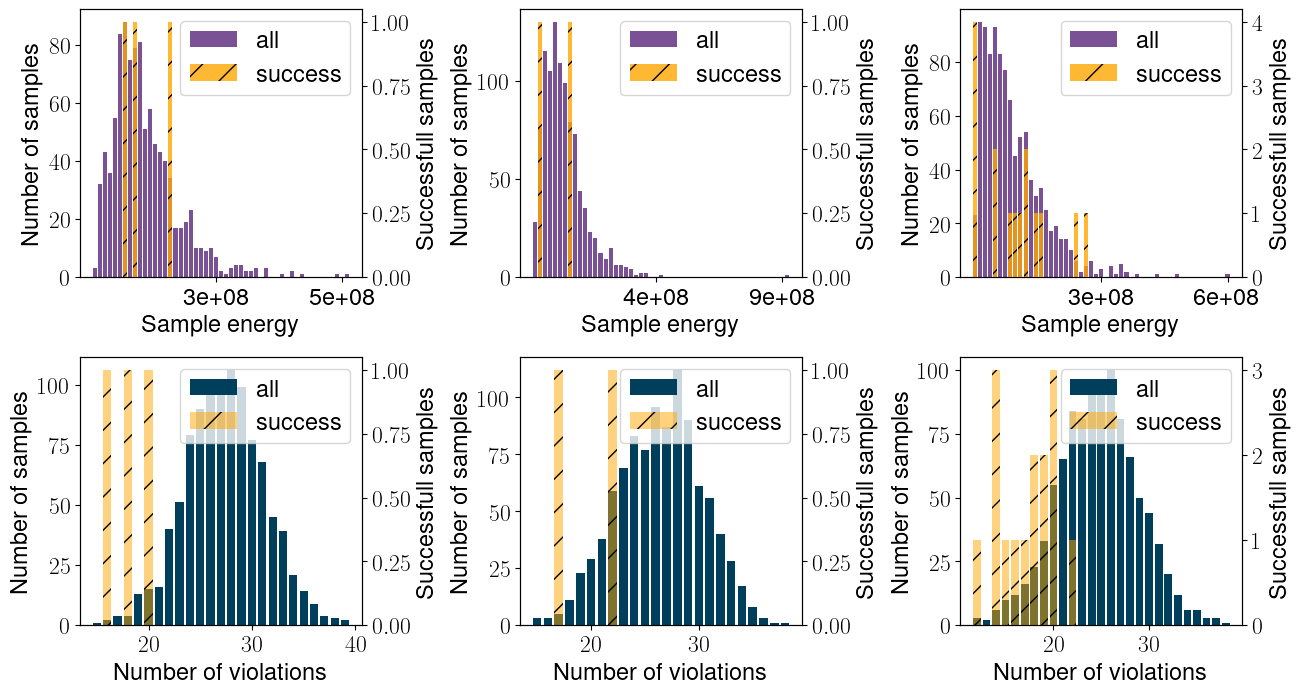

In [50]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
colors = ['#003f5c','#7a5195','#ef5675','#ffa600']
# Set the formatter for the y-axis to use scientific notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))


# violations plot
for i,ax_number in enumerate(axs[1]):
    ax_success = ax_number.twinx()
    

    result_df = result_dfs[N][i]
    violations_grouped = result_df[['num_occurrences', 'violations']].groupby(by='violations').sum().reset_index()

    valid_df = result_df.query('valid')
    valid_violations_grouped = valid_df[['num_occurrences', 'violations']].groupby(by='violations').sum().reset_index()

    ax_number.bar(violations_grouped['violations'], violations_grouped['num_occurrences'], color=colors[0], label='all')
    ax_number.set_ylabel('Number of samples')
    
    ax_number.set_xlabel('Number of violations')
    ax_success.set_ylabel('Successfull samples')

    ax_success.bar(valid_violations_grouped['violations'], valid_violations_grouped['num_occurrences'], hatch='/', color=colors[3], alpha=0.5, label='success')

    # Add legends for both bar graphs
    lines1, labels1 = ax_number.get_legend_handles_labels()
    lines2, labels2 = ax_success.get_legend_handles_labels()

    ax_number.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# energy plot

for i,ax_number in enumerate(axs[0]):
    ax_success = ax_number.twinx()
    result_df = result_dfs[N][i]
    divisor = ((result_df['energy'].max()-result_df['energy'].min())/ 50)
    result_df['chunk'] = (result_df['energy']/divisor).round(0).astype(int)-1
    result_df_grouped = result_df[['num_occurrences','chunk']].groupby(by='chunk').sum().reset_index()
    ax_number.bar(result_df_grouped['chunk'], result_df_grouped['num_occurrences'], color=colors[1],label='all')
    # Define custom x-tick positions
    xticks = [25, 50]
    ax_number.set_xticks(xticks)

    # Format the x-tick labels in scientific notation
    xtick_labels = ['{:.0e}'.format(tick*divisor) for tick in xticks]
    ax_number.set_xticklabels(xtick_labels)

    valid_df = result_df.query('valid')
    valid_df_grouped = valid_df[['num_occurrences','chunk']].groupby(by='chunk').sum().reset_index()
    ax_success.bar(valid_df_grouped['chunk'], valid_df_grouped['num_occurrences'], color=colors[3], hatch='/', alpha=0.8, label='success')

    ax_number.set_ylabel('Number of samples')
    
    ax_number.set_xlabel('Sample energy')
    
    ax_success.set_ylabel('Successfull samples')

    # Add legends for both bar graphs
    lines1, labels1 = ax_number.get_legend_handles_labels()
    lines2, labels2 = ax_success.get_legend_handles_labels()

    ax_number.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    #ax_success.legend([])
plt.subplots_adjust(hspace=0.3, wspace=0.56)
plt.savefig('figures/mc_success_analysis.svg', bbox_inches='tight')
#plt.suptitle('Comparison of histogram for N=253009. The first row shows the histogram for the number of violations, the second row for the energy.')
plt.show()

In [ ]:
a=result_dfs[N][2]


In [15]:

result_df['chunk'] = (result_df['energy']/((result_df['energy'].max()-result_df['energy'].min())/ 50)).round(0).astype(int)-1
result_df_grouped = result_df[['num_occurrences','chunk']].groupby(by='chunk').sum().reset_index()
result_df_grouped

,chunk,num_occurrences
0,0,23
1,1,95
2,2,93
3,3,83
4,4,93
5,5,83
6,6,77
7,7,66
8,8,45
9,9,52


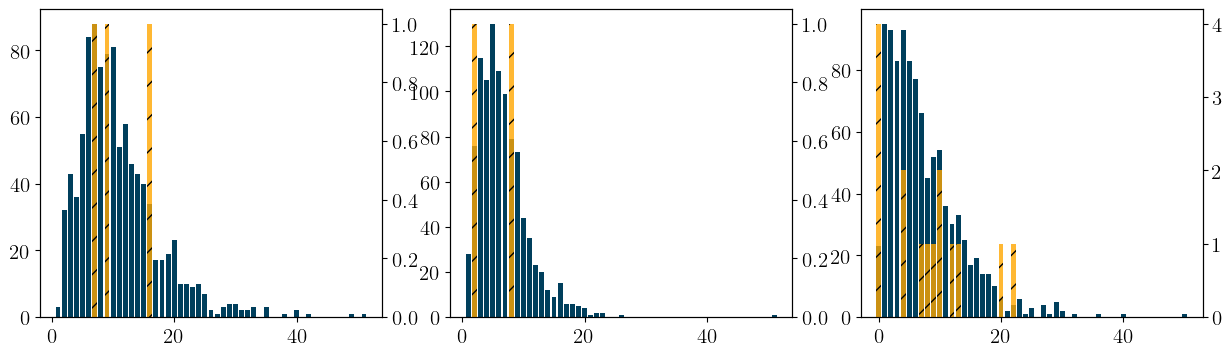

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs= axs.flatten()
colors = ['#003f5c', '#7a5195', '#ef5675', '#ffa600']

for i,ax_number in enumerate(axs):
    ax_success = ax_number.twinx()

    result_df = result_dfs[N][i]
    result_df['chunk'] = (result_df['energy']/((result_df['energy'].max()-result_df['energy'].min())/ 50)).round(0).astype(int)-1
    result_df_grouped = result_df[['num_occurrences','chunk']].groupby(by='chunk').sum().reset_index()
    ax_number.bar(result_df_grouped['chunk'], result_df_grouped['num_occurrences'], color=colors[0])

    valid_df = result_df.query('valid')
    valid_df_grouped = valid_df[['num_occurrences','chunk']].groupby(by='chunk').sum().reset_index()
    ax_success.bar(valid_df_grouped['chunk'], valid_df_grouped['num_occurrences'], color=colors[3], hatch='/', alpha=0.8)
    

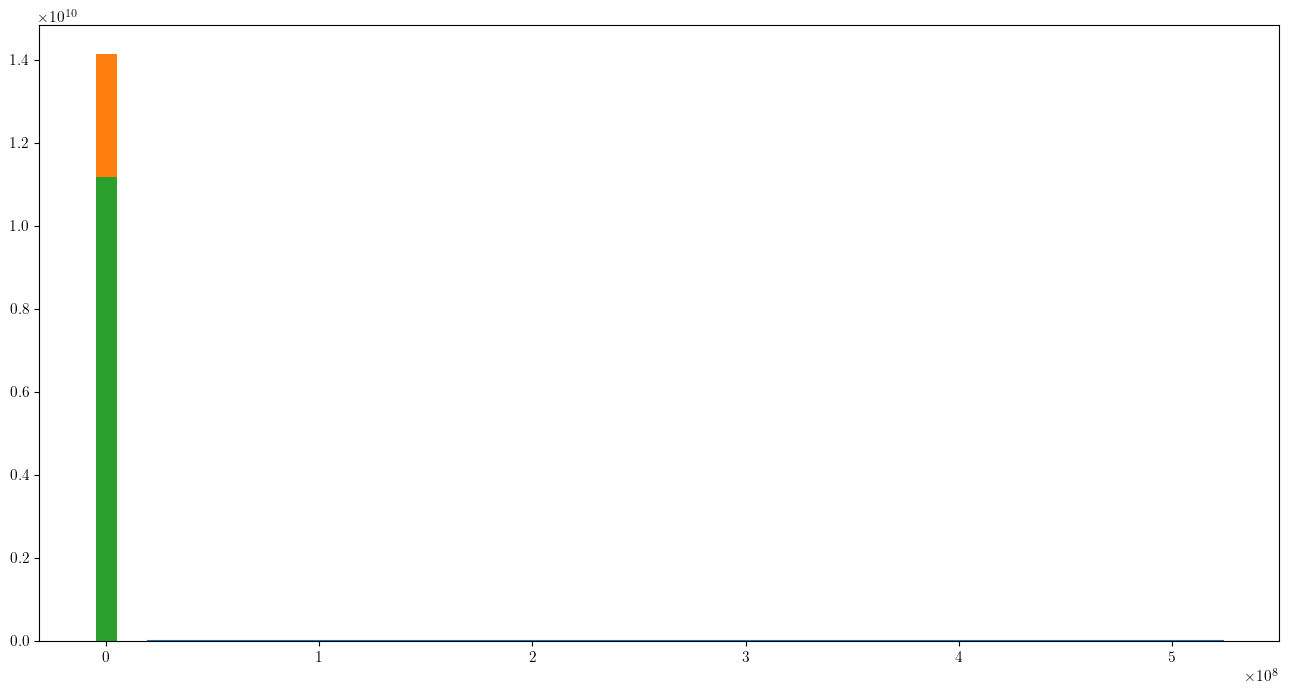

[]

In [36]:
fig = plt.figure(figsize=(16,8))
#ax_energy = fig.gca()
#ax_success = ax_energy.twinx()



#plt.setp(ax_energy.spines.values(), linewidth=3)

plt.plot(result_dfs[N][0]['energy'], result_dfs[N][0]['num_occurrences'])

for result_df in result_dfs[N]:
    valid_df = result_df.query('valid==True')
    #plt.bar(list(valid_df['energy']), list(valid_df['num_occurrences']),width =1e7)
    plt.bar(list(result_df['violations']), list(result_df['energy']),width =1e7)

#ax_success.bar([1,1e4,3e10], [5,2,3],width =1e8)


plt.show()
list(valid_df['energy'])
result_dfs[0]